In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:


    def __init__(self,train_data,train_labels):
      assert (len(train_data)==len(train_labels)),"length of train_data and train_labels must match"
      self.__raw_data=train_data
      self.__train_data=np.append(train_data,np.array([[1]]*len(train_data)),axis=1)
      assert all(np.isin(train_labels,[0,1])),"'train_lables' should contain only 0s or 1s"
      self.train_labels=train_labels
      # negate y values from class 1
      for i,c in enumerate(train_labels):
        if c==1:
          self.__train_data[i]=-self.__train_data[i]
      # initialise weight vector, set default learning rate
      self.__weight=np.zeros_like(self.__train_data[0])
      self.__learning_rate=0.01
      self.__split_for_plotting()


    def __split_for_plotting(self):
        self.x1=[]
        self.y1=[]
        self.x2=[]
        self.y2=[]
        for i,p in enumerate(self.__raw_data):
          if self.train_labels[i]==1:
            self.x1.append(p[0])
            self.y1.append(p[1])
          else:
            self.x2.append(p[0])
            self.y2.append(p[1])

    # to manually set wait vector


    def set_weight(self,weight):
      if weight.shape!=self.__weight.shape:
        raise ValueError(f"given weight vector must be of shape 1x(d+1), 1x{self.__weight.shape[0]} herself.__weight=weight")
    # to set learning rate



    def set_learning_rate(self,learning_rate):
      self.__learning_rate=learning_rate
    # to do 1 iteration of learning



    def train(self):
      gradient_of_Jp=np.zeros_like(self.__weight)
      for y in self.__train_data:
        if not self.__weight @ y > 0:
          gradient_of_Jp+=y
      print(f'gradient of Jp = {gradient_of_Jp}')
      print(f"new weight = old weight + learning rate * gradient of Jp\n = {self.__weight} + {self.__learning_rate} * {gradient_of_Jp}\n = {self.__weight + self.__learning_rate * gradient_of_Jp}")
      self.__weight= self.__weight + self.__learning_rate * gradient_of_Jp
      print(f" = {self.__weight}\n")
    # to plot the data and the decision boundary



    def show_plot(self,title=''):
    # styles
      plt.figure(figsize=(8,8))
      plt.figtext(0.5, 0.9, title, ha="center", fontsize=20)
      plt.axvline(0,color='black',linewidth=.8)
      plt.axhline(0,color='black',linewidth=.8)
      plt.grid(color='grey', linestyle=':', linewidth=.5)
      # plotting data
      plt.scatter(self.x1,self.y1)
      plt.scatter(self.x2,self.y2)
      # plotting decision boundary
      if np.any(self.__weight[:-1]):
        a,b,c=self.__weight
        if b==0:
          plt.axvline(-c/a, c='black', label='decision boundary')
        else:
          y_intercept=-c/b
          slope=-a/b
          plt.axline((0,y_intercept), slope=slope, c='black', label='decision boundary')
        plt.legend(loc='best',fontsize=16)
      plt.figtext(0.5, 0.04, "weight vector : "+str(self.__weight), ha="center", fontsize=20)
      title=title.replace(' ','_')
      # plt.savefig(f'output_images/{title}.png')
      plt.show()


    def get_weight(self):
        return self.__weight


    def demo(data,label,plot_title='',learning_rate=None,weight=None):
      a=Perceptron(data,label)
      if learning_rate is not None:
        a.set_learning_rate(learning_rate)
      if weight is not None:
        a.set_weight(weight)
      if plot_title!='':
        plot_title=plot_title+' '
      a.show_plot(plot_title+"perceptron before training")
      i=1
      prev_weight=a.get_weight()
      while True:
          print(f"perceptron iteration {i}:\n")
          a.train()
          a.show_plot(plot_title+f"perceptron iteration {i}")
          i+=1
          if np.allclose(prev_weight,a.get_weight()):
            break
          prev_weight=a.get_weight()
      print("no significant change in weight vector after this iteration. stopping.")

In [2]:
from cvxopt import matrix
from cvxopt import solvers


class svm:


  def __init__(self,train_data,train_labels):
    self.__X=train_data
    self.__Y=np.array([train_labels,])
    self.__weight=[]
    self.__bias=None
    self.__split_for_plotting()



  def train(self):
    n=self.__X.shape[0]
    H=matrix(np.multiply((self.__Y.T @ self.__Y),(self.__X @ self.__X.T)).astype(float))
    f=matrix(np.array([-1]*n).astype(float),tc='d')
    A=matrix(-np.eye(n).astype(float))
    a=matrix(np.array([0.0]*n).astype(float))
    B=matrix(self.__Y.astype(float),tc='d')
    b=matrix(0.0)
    solvers.options['show_progress'] = False
    solution = solvers.qp(H,f,A,a,B,b)
    alphas = np.array(solution['x'])
    self.__weight=np.zeros_like(self.__X[0],dtype=float)
    for i,alpha in enumerate(alphas):
      self.__weight+=alpha*self.__Y[0][i]*self.__X[i]
    max_index=np.argmax(alphas)
    self.__bias = self.__Y[0][max_index] - self.__weight.T @ self.__X[max_index]



  def __split_for_plotting(self):
    self.x1=[]
    self.y1=[]
    self.x2=[]
    self.y2=[]
    for i,p in enumerate(self.__X):
      if self.__Y[0][i]==1:
        self.x1.append(p[0])
        self.y1.append(p[1])
      else:
        self.x2.append(p[0])
        self.y2.append(p[1])



  def show_plot(self,title=''):
      # styles
      plt.figure(figsize=(8,8))
      plt.figtext(0.5, 0.9, title, ha="center", fontsize=20)
      plt.axvline(0,color='black',linewidth=.8)
      plt.axhline(0,color='black',linewidth=.8)
      plt.grid(color='grey', linestyle=':', linewidth=.5)
      # plotting data
      plt.scatter(self.x2,self.y2)
      plt.scatter(self.x1,self.y1)
      # plotting decision boundary
      if np.any(self.__weight):
          a,b=self.__weight
          c=self.__bias
          if b==0:
              plt.axvline(-c/a, c='black', label='decision boundary')
          else:
              y_intercept=-c/b
              slope=-a/b
              plt.axline((0,y_intercept), slope=slope, c='black', label='decision boundary')
          plt.legend(loc='best',fontsize=16)
      plt.figtext(0.5, 0.01, f'weight : {self.__weight}\nbias : {self.__bias}', ha="center", fontsize=20)
      title=title.replace(' ','_')
      # plt.savefig(f'output_images/{title}.png')
      plt.show()



  def demo(data,label,plot_title=''):
          a=svm(data,label)
          if plot_title!='':
               plot_title=plot_title+' '
          a.show_plot(plot_title+"svm before training")
          a.train()
          a.show_plot(plot_title+"svm after training")

ImportError: dlopen(/opt/homebrew/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): tried: '/opt/homebrew/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so' (no such file), '/opt/homebrew/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))

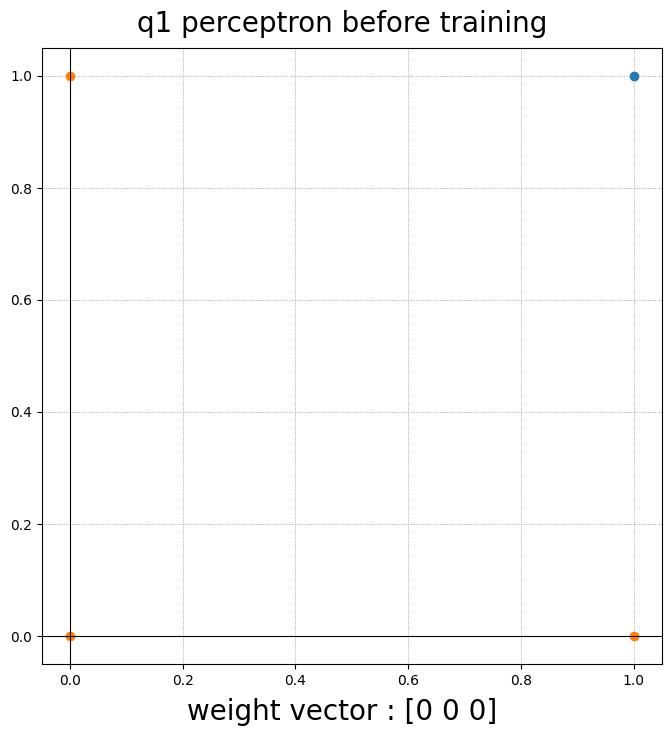

perceptron iteration 1:

gradient of Jp = [0 0 2]
new weight = old weight + learning rate * gradient of Jp
 = [0 0 0] + 0.5 * [0 0 2]
 = [0. 0. 1.]
 = [0. 0. 1.]



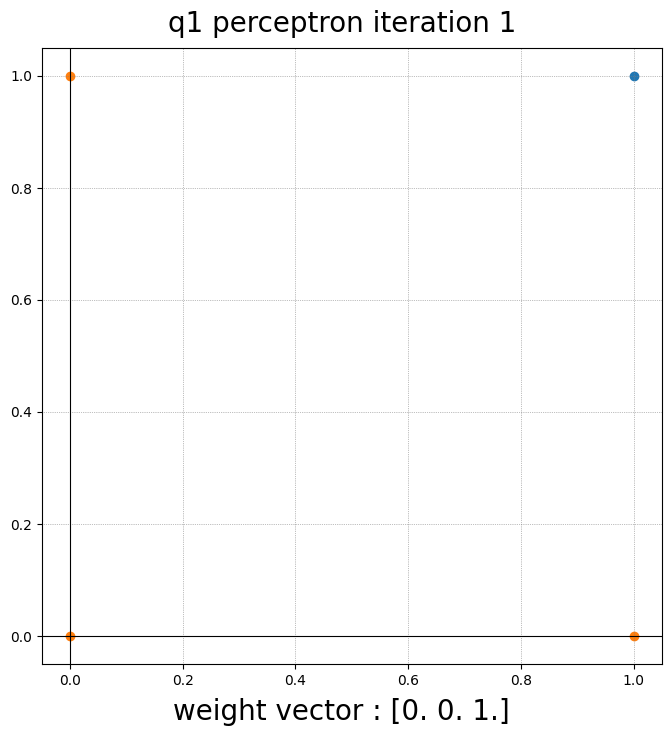

perceptron iteration 2:

gradient of Jp = [-1. -1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [0. 0. 1.] + 0.5 * [-1. -1. -1.]
 = [-0.5 -0.5  0.5]
 = [-0.5 -0.5  0.5]



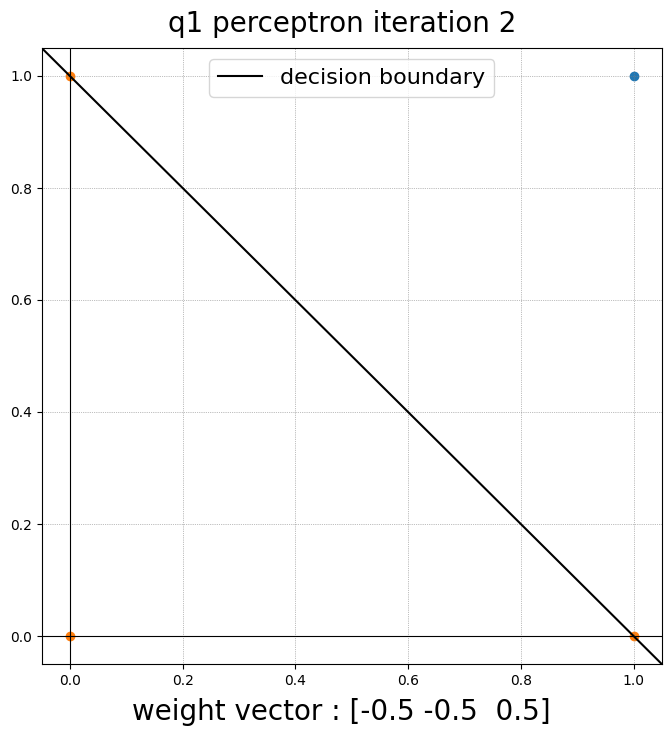

perceptron iteration 3:

gradient of Jp = [1. 1. 2.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.5 -0.5  0.5] + 0.5 * [1. 1. 2.]
 = [0.  0.  1.5]
 = [0.  0.  1.5]



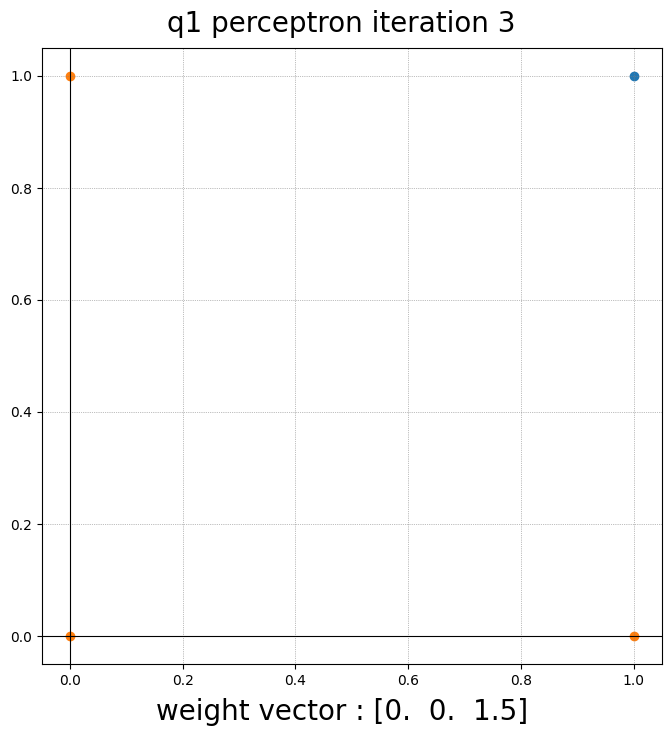

perceptron iteration 4:

gradient of Jp = [-1. -1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [0.  0.  1.5] + 0.5 * [-1. -1. -1.]
 = [-0.5 -0.5  1. ]
 = [-0.5 -0.5  1. ]



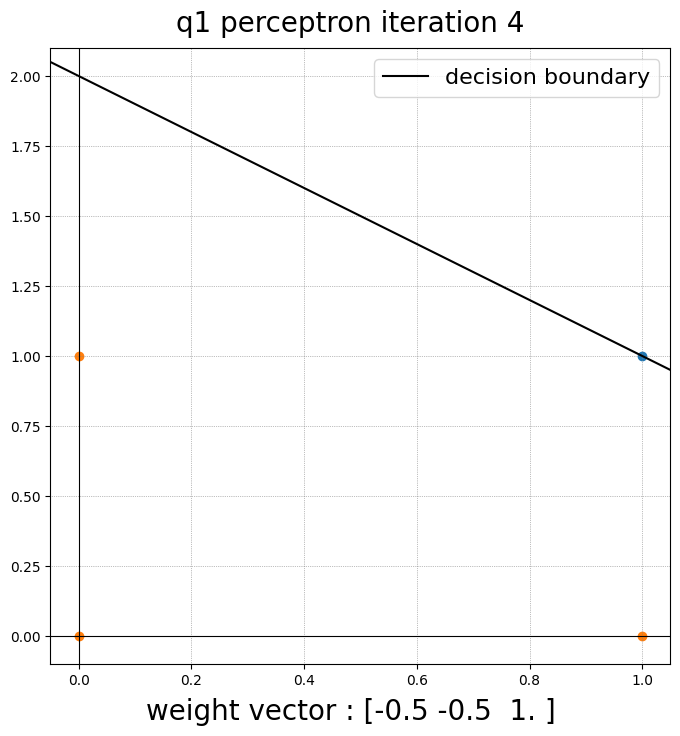

perceptron iteration 5:

gradient of Jp = [-1. -1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.5 -0.5  1. ] + 0.5 * [-1. -1. -1.]
 = [-1.  -1.   0.5]
 = [-1.  -1.   0.5]



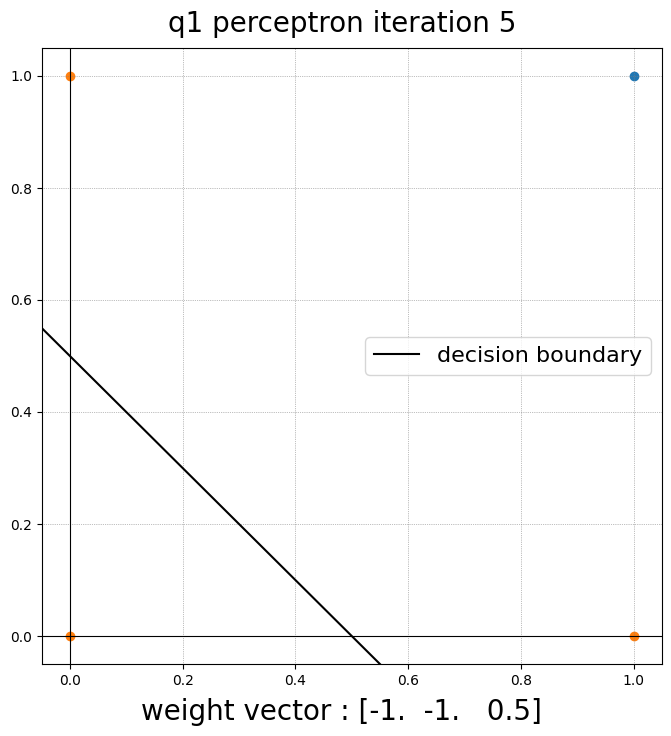

perceptron iteration 6:

gradient of Jp = [1. 1. 2.]
new weight = old weight + learning rate * gradient of Jp
 = [-1.  -1.   0.5] + 0.5 * [1. 1. 2.]
 = [-0.5 -0.5  1.5]
 = [-0.5 -0.5  1.5]



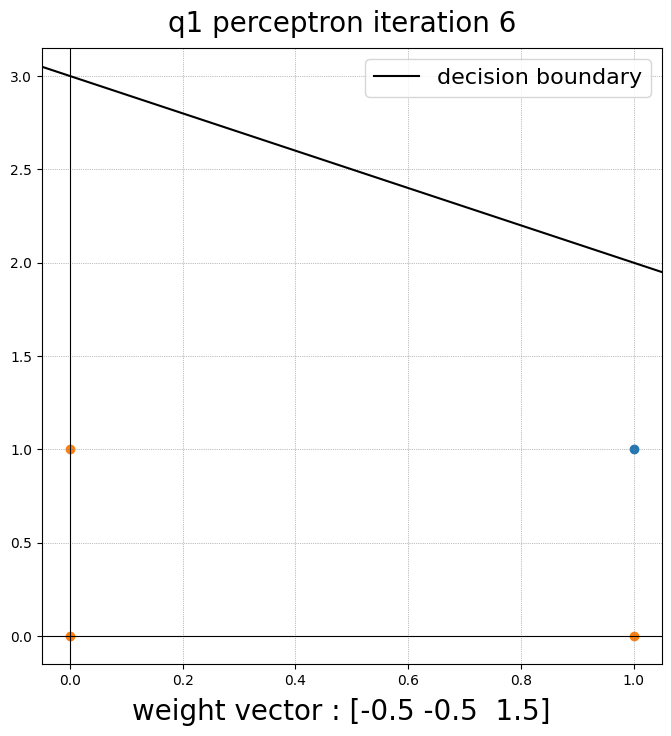

perceptron iteration 7:

gradient of Jp = [-1. -1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.5 -0.5  1.5] + 0.5 * [-1. -1. -1.]
 = [-1. -1.  1.]
 = [-1. -1.  1.]



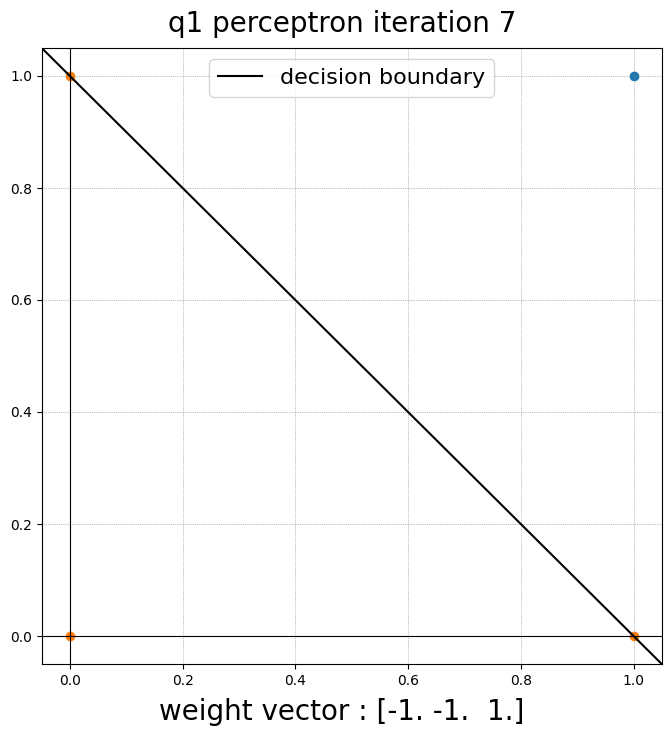

perceptron iteration 8:

gradient of Jp = [1. 1. 2.]
new weight = old weight + learning rate * gradient of Jp
 = [-1. -1.  1.] + 0.5 * [1. 1. 2.]
 = [-0.5 -0.5  2. ]
 = [-0.5 -0.5  2. ]



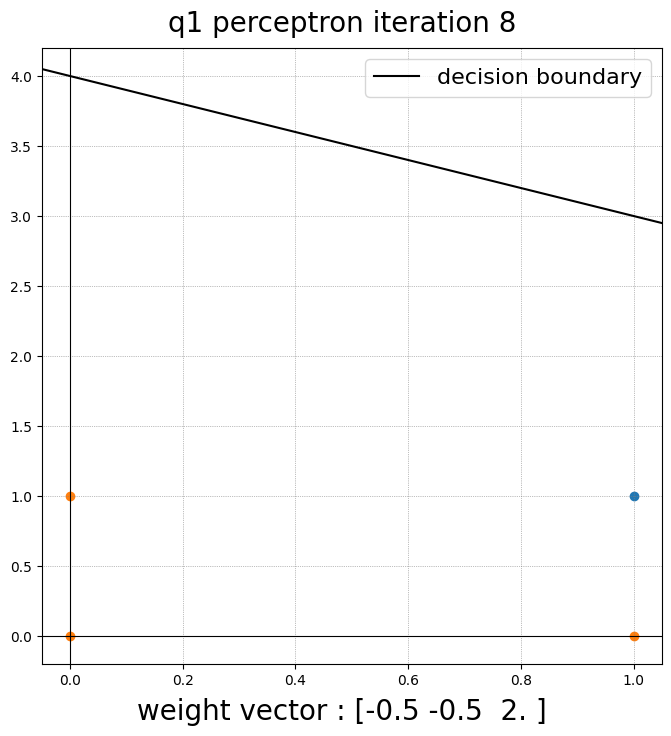

perceptron iteration 9:

gradient of Jp = [-1. -1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.5 -0.5  2. ] + 0.5 * [-1. -1. -1.]
 = [-1.  -1.   1.5]
 = [-1.  -1.   1.5]



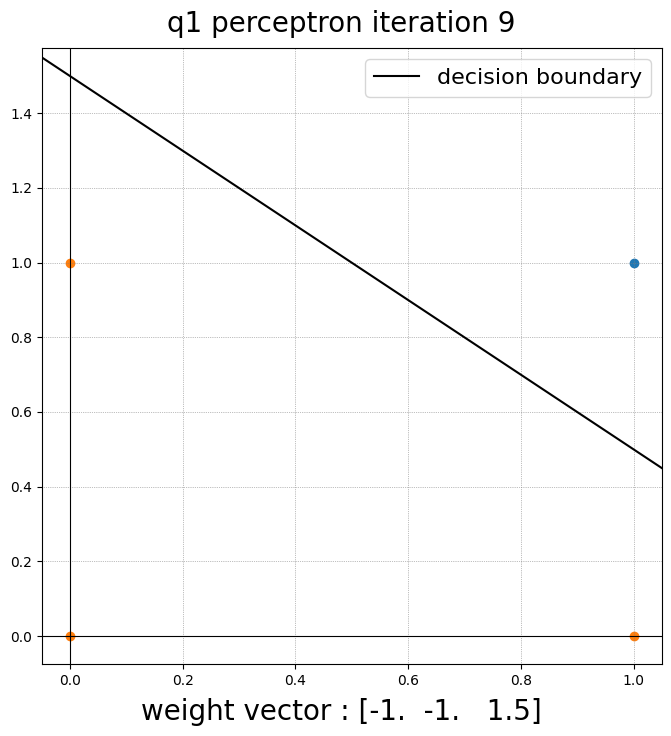

perceptron iteration 10:

gradient of Jp = [0. 0. 0.]
new weight = old weight + learning rate * gradient of Jp
 = [-1.  -1.   1.5] + 0.5 * [0. 0. 0.]
 = [-1.  -1.   1.5]
 = [-1.  -1.   1.5]



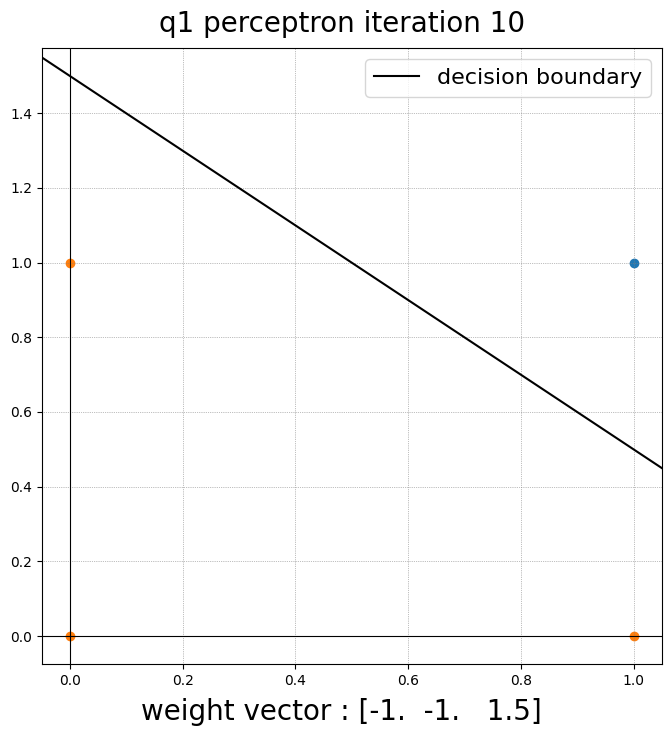

no significant change in weight vector after this iteration. stopping.


In [ ]:

import numpy as np
data = np.array([[0,0],[0,1],[1,0],[1,1]])
perc_label = np.array([0, 0, 0, 1])

Perceptron.demo(data,perc_label,learning_rate=0.5,plot_title="q1")



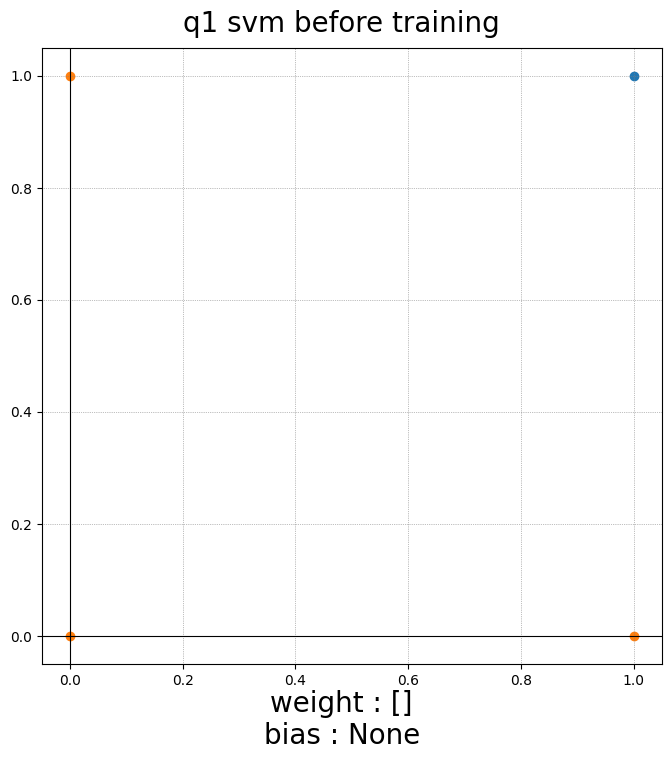

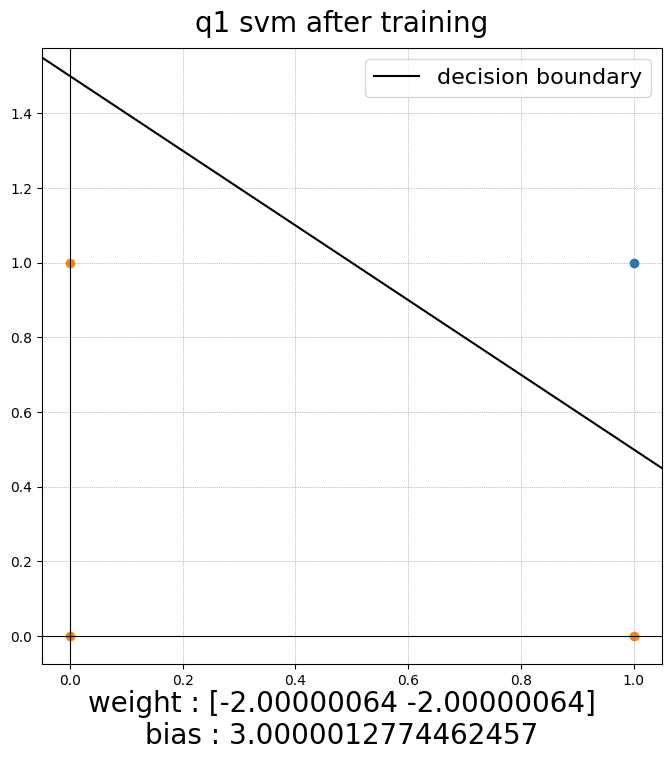

In [ ]:
svm_label = np.array([1, 1, 1, -1])
svm.demo(data,svm_label,plot_title="q1")

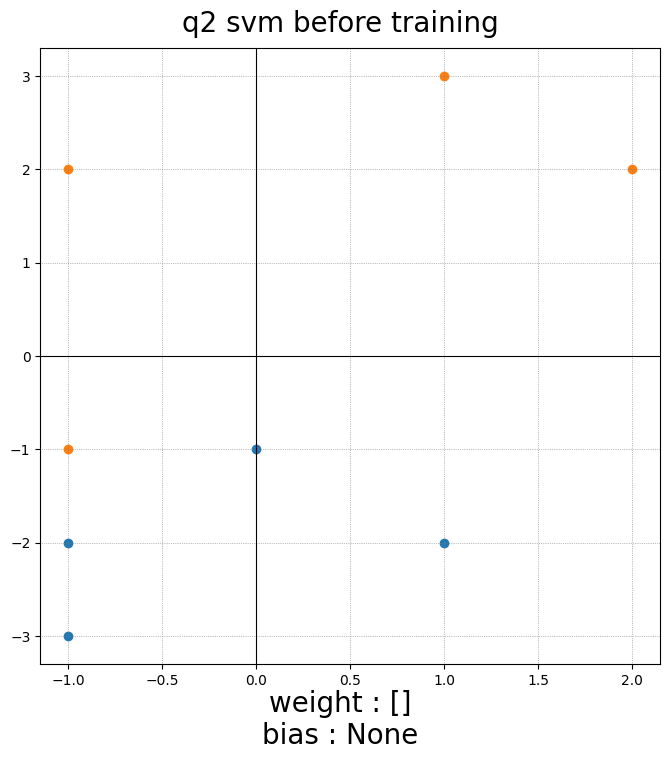

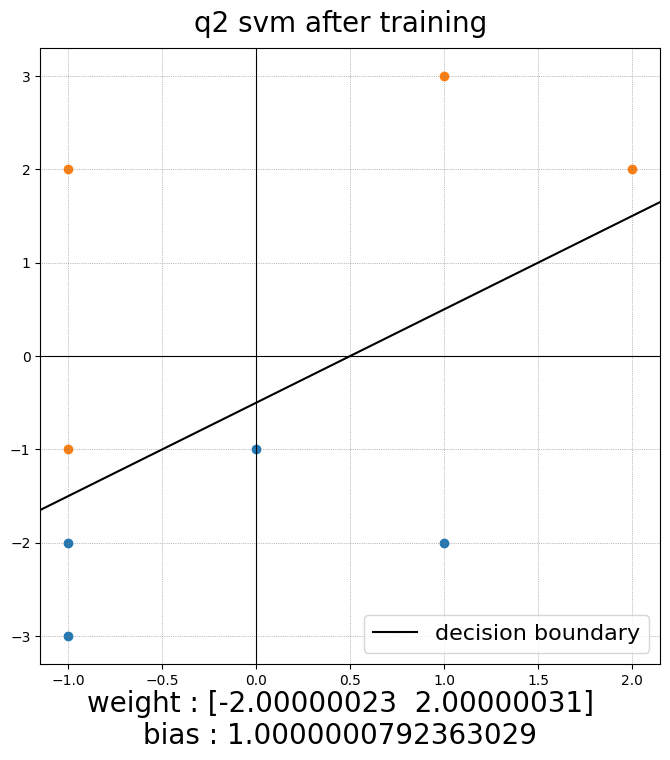

learning rate = 0.01



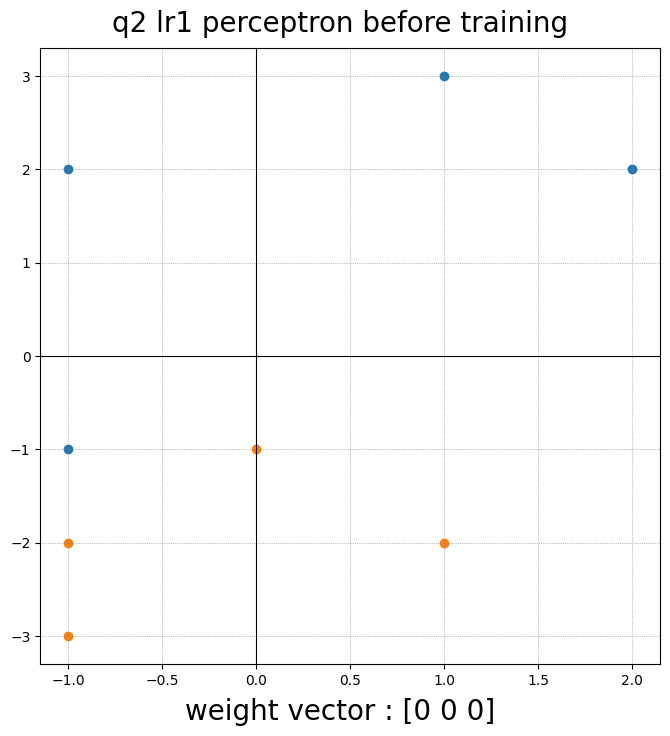

perceptron iteration 1:

gradient of Jp = [ -2 -14   0]
new weight = old weight + learning rate * gradient of Jp
 = [0 0 0] + 0.01 * [ -2 -14   0]
 = [-0.02 -0.14  0.  ]
 = [-0.02 -0.14  0.  ]



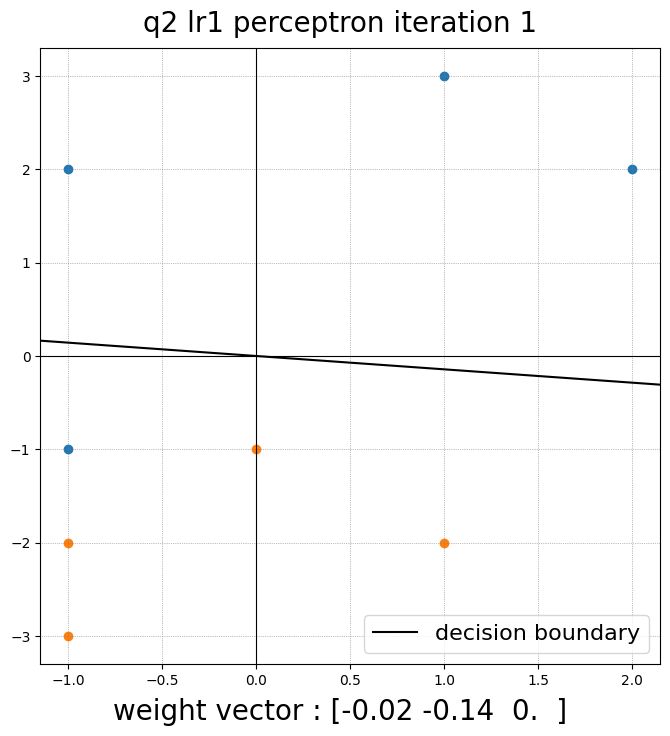

perceptron iteration 2:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.02 -0.14  0.  ] + 0.01 * [ 1.  1. -1.]
 = [-0.01 -0.13 -0.01]
 = [-0.01 -0.13 -0.01]



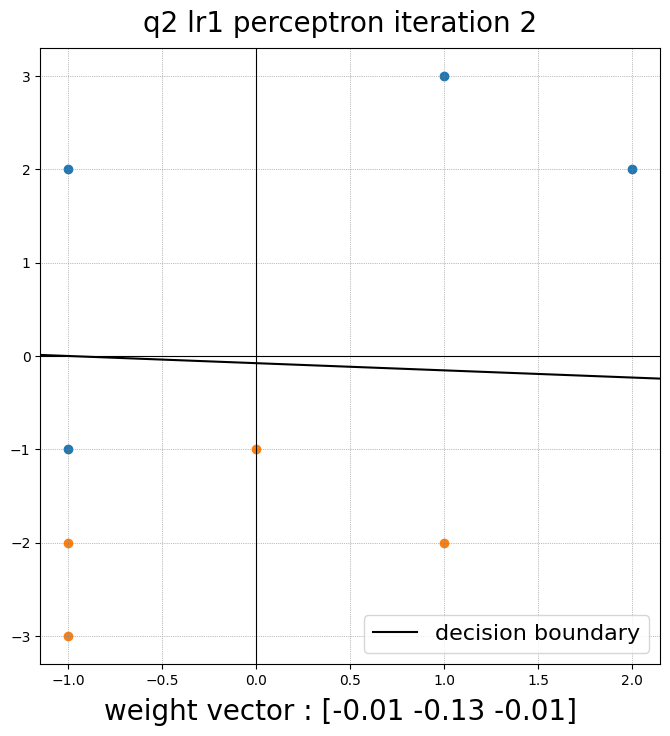

perceptron iteration 3:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.01 -0.13 -0.01] + 0.01 * [ 1.  1. -1.]
 = [ 0.   -0.12 -0.02]
 = [ 0.   -0.12 -0.02]



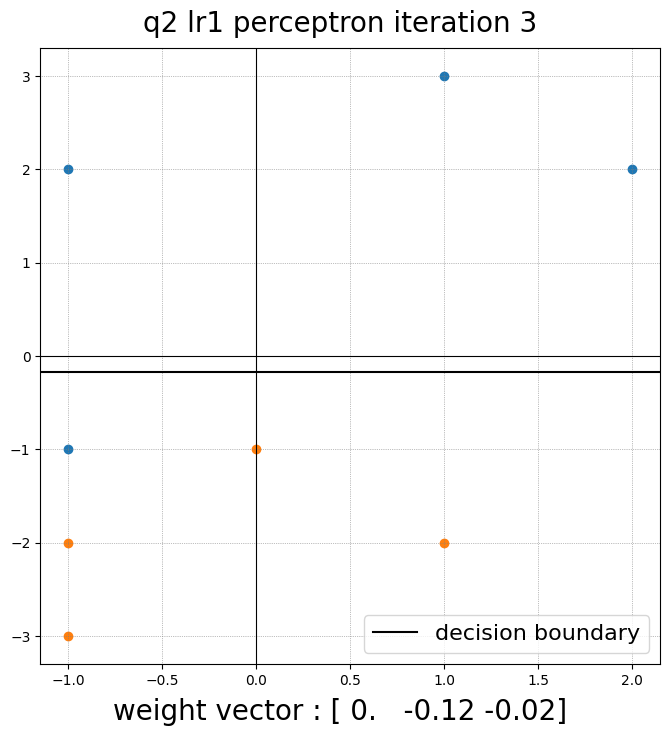

perceptron iteration 4:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 0.   -0.12 -0.02] + 0.01 * [ 1.  1. -1.]
 = [ 0.01 -0.11 -0.03]
 = [ 0.01 -0.11 -0.03]



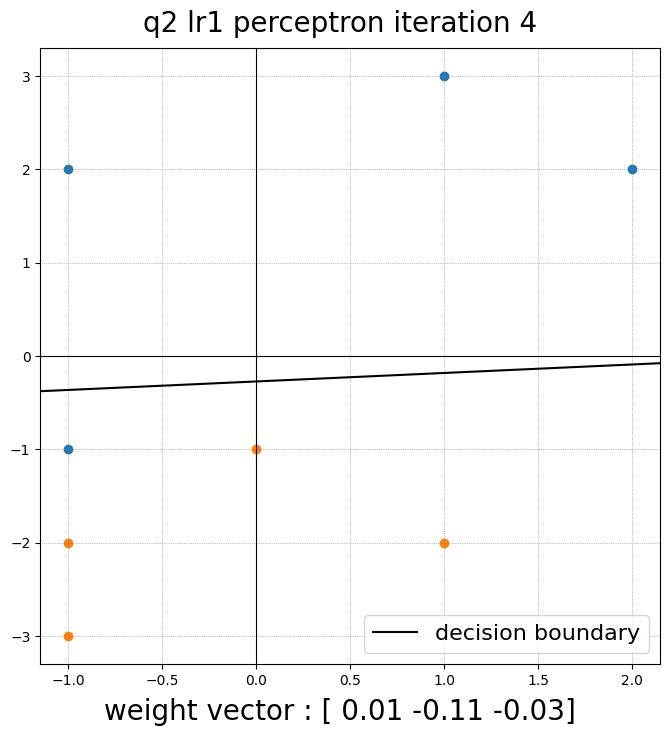

perceptron iteration 5:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 0.01 -0.11 -0.03] + 0.01 * [ 1.  1. -1.]
 = [ 0.02 -0.1  -0.04]
 = [ 0.02 -0.1  -0.04]



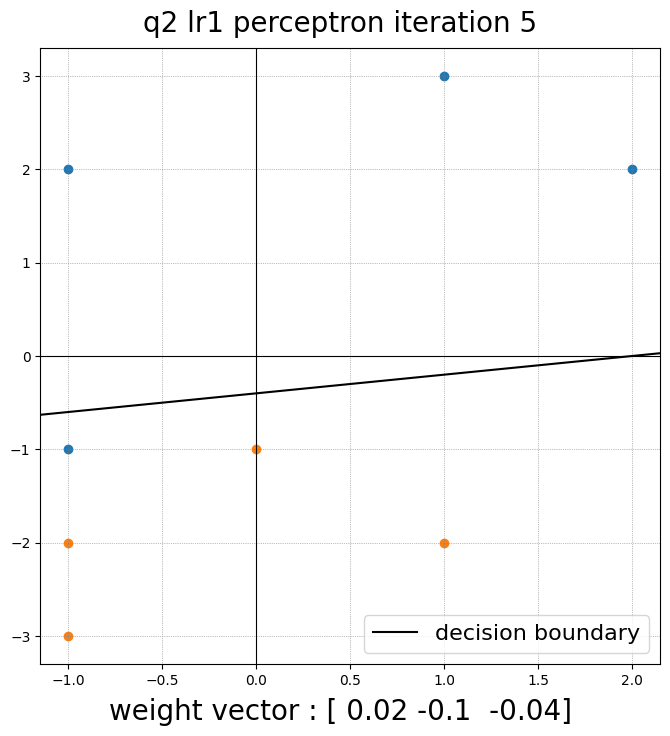

perceptron iteration 6:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 0.02 -0.1  -0.04] + 0.01 * [ 1.  1. -1.]
 = [ 0.03 -0.09 -0.05]
 = [ 0.03 -0.09 -0.05]



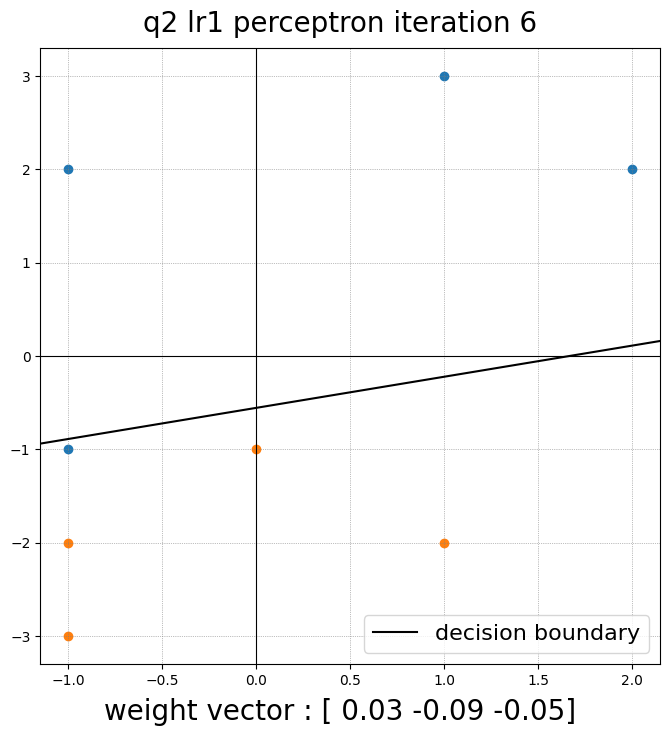

perceptron iteration 7:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 0.03 -0.09 -0.05] + 0.01 * [ 1.  1. -1.]
 = [ 0.04 -0.08 -0.06]
 = [ 0.04 -0.08 -0.06]



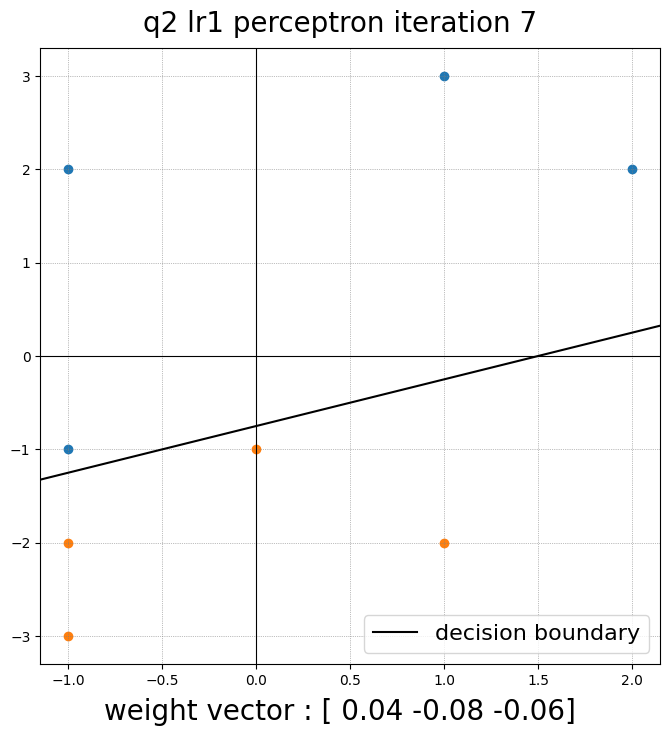

perceptron iteration 8:

gradient of Jp = [0. 0. 0.]
new weight = old weight + learning rate * gradient of Jp
 = [ 0.04 -0.08 -0.06] + 0.01 * [0. 0. 0.]
 = [ 0.04 -0.08 -0.06]
 = [ 0.04 -0.08 -0.06]



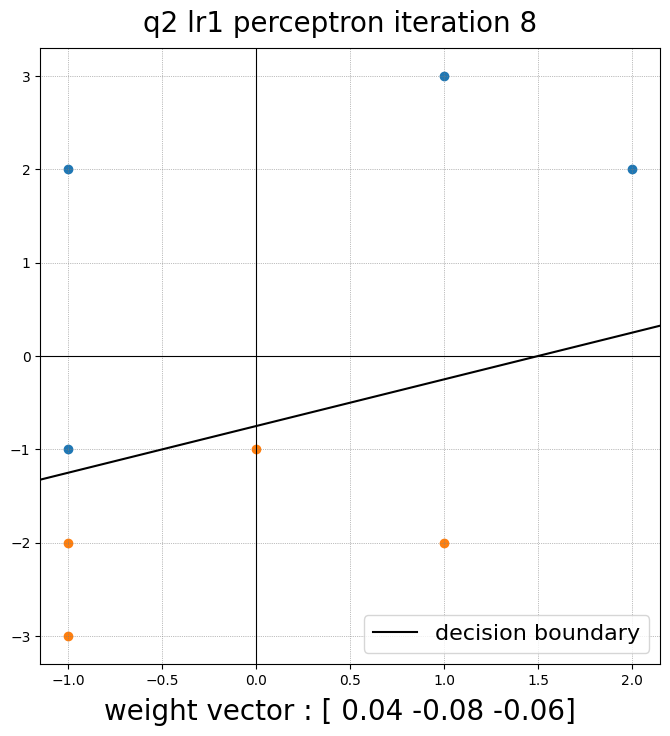

no significant change in weight vector after this iteration. stopping.

learning rate = 0.5



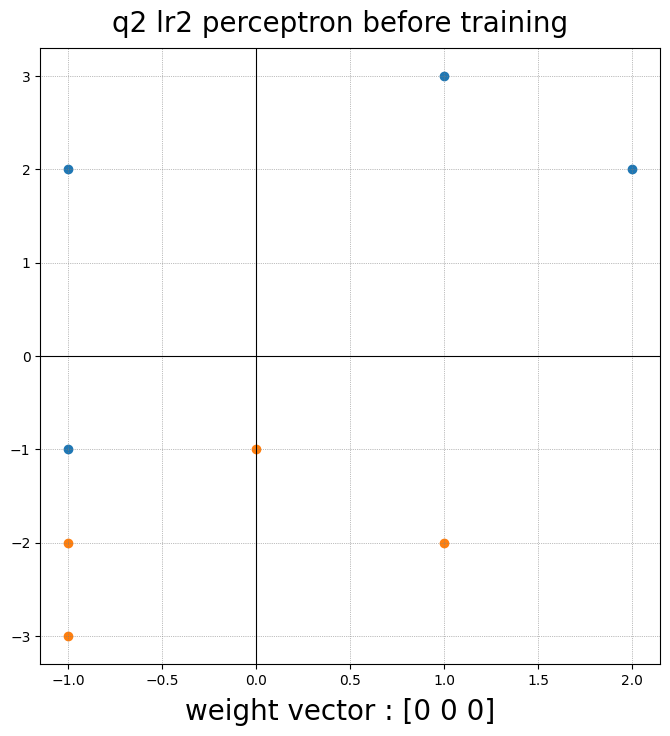

perceptron iteration 1:

gradient of Jp = [ -2 -14   0]
new weight = old weight + learning rate * gradient of Jp
 = [0 0 0] + 0.5 * [ -2 -14   0]
 = [-1. -7.  0.]
 = [-1. -7.  0.]



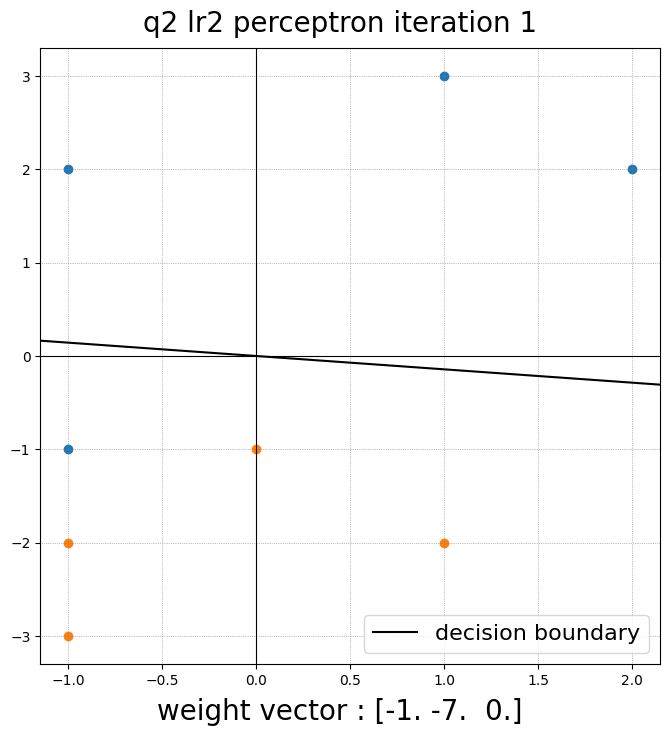

perceptron iteration 2:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [-1. -7.  0.] + 0.5 * [ 1.  1. -1.]
 = [-0.5 -6.5 -0.5]
 = [-0.5 -6.5 -0.5]



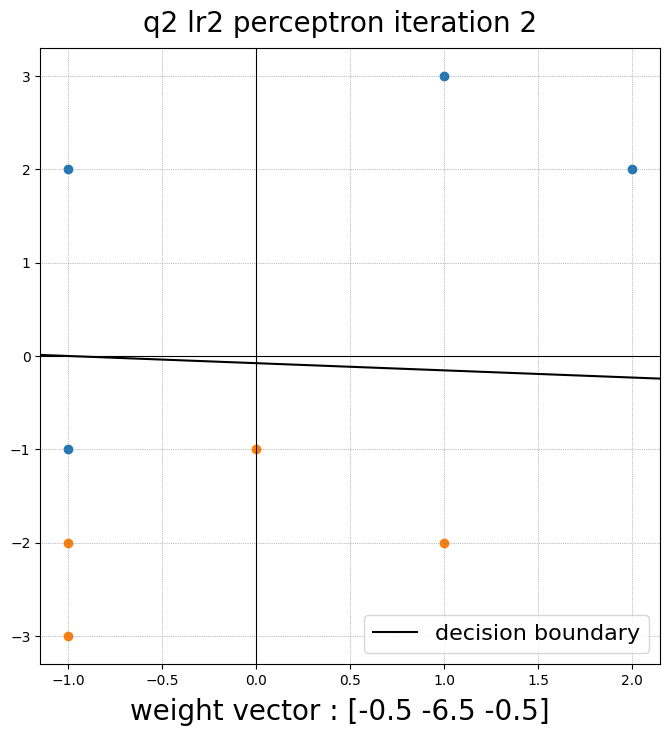

perceptron iteration 3:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.5 -6.5 -0.5] + 0.5 * [ 1.  1. -1.]
 = [ 0. -6. -1.]
 = [ 0. -6. -1.]



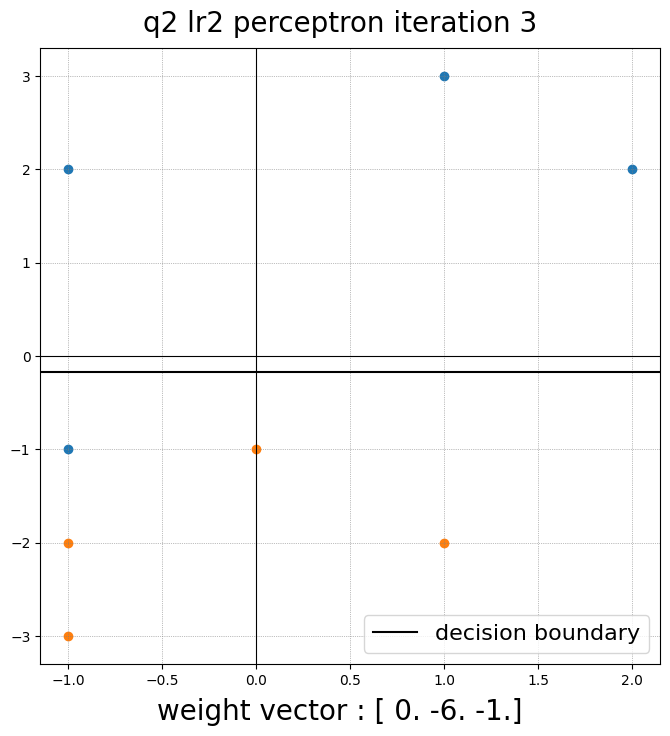

perceptron iteration 4:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 0. -6. -1.] + 0.5 * [ 1.  1. -1.]
 = [ 0.5 -5.5 -1.5]
 = [ 0.5 -5.5 -1.5]



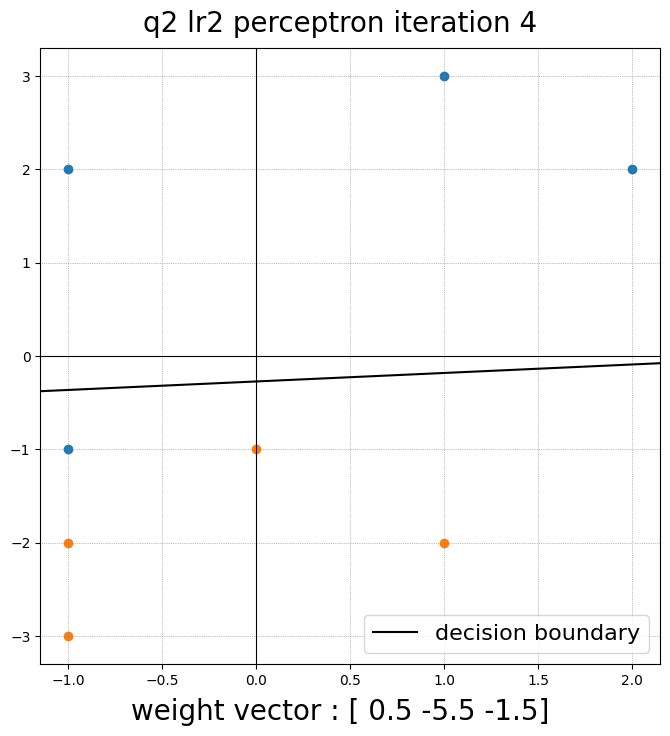

perceptron iteration 5:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 0.5 -5.5 -1.5] + 0.5 * [ 1.  1. -1.]
 = [ 1. -5. -2.]
 = [ 1. -5. -2.]



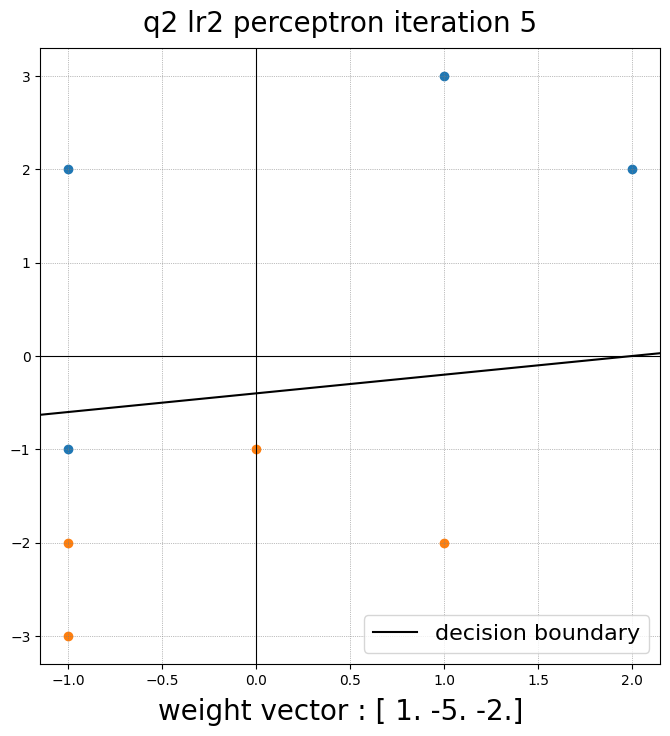

perceptron iteration 6:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 1. -5. -2.] + 0.5 * [ 1.  1. -1.]
 = [ 1.5 -4.5 -2.5]
 = [ 1.5 -4.5 -2.5]



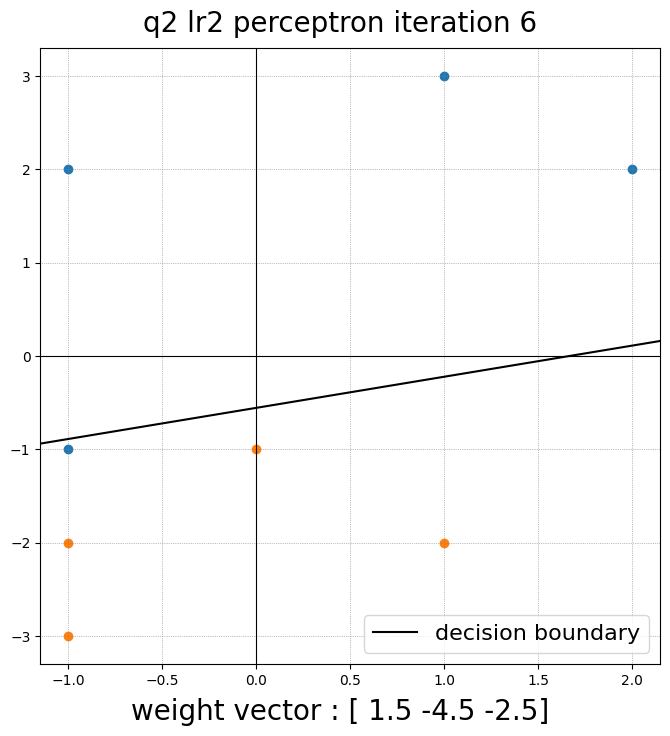

perceptron iteration 7:

gradient of Jp = [ 1.  1. -1.]
new weight = old weight + learning rate * gradient of Jp
 = [ 1.5 -4.5 -2.5] + 0.5 * [ 1.  1. -1.]
 = [ 2. -4. -3.]
 = [ 2. -4. -3.]



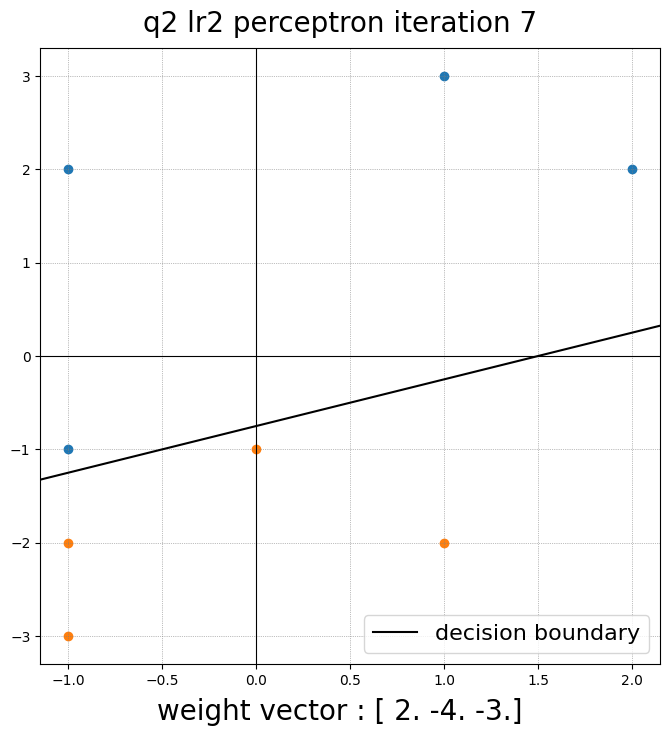

perceptron iteration 8:

gradient of Jp = [0. 0. 0.]
new weight = old weight + learning rate * gradient of Jp
 = [ 2. -4. -3.] + 0.5 * [0. 0. 0.]
 = [ 2. -4. -3.]
 = [ 2. -4. -3.]



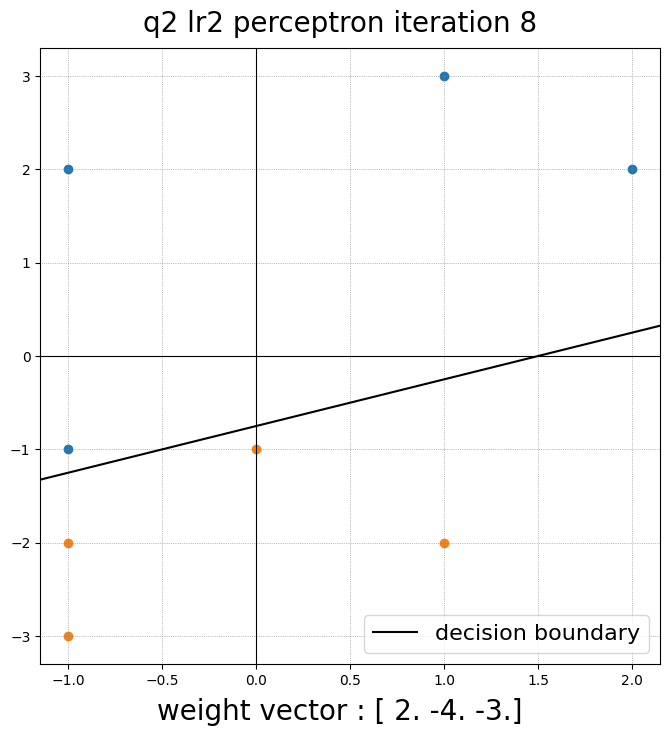

no significant change in weight vector after this iteration. stopping.


In [ ]:
import numpy as np
data = np.array([[2,2],[-1,-3],[-1,2],[0,-1],[1,3],[-1,-2],[1,-2],[-1,-1]])
perc_label = np.array([1, 0, 1, 0, 1, 0, 0, 1])
svm_label = np.array([1, -1, 1, -1, 1, -1, -1, 1])
svm.demo(data,svm_label,plot_title="q2")
print('learning rate = 0.01\n')
Perceptron.demo(data,perc_label,learning_rate=0.01,plot_title="q2 lr1")
print('\nlearning rate = 0.5\n')
Perceptron.demo(data,perc_label,learning_rate=0.5,plot_title="q2 lr2")

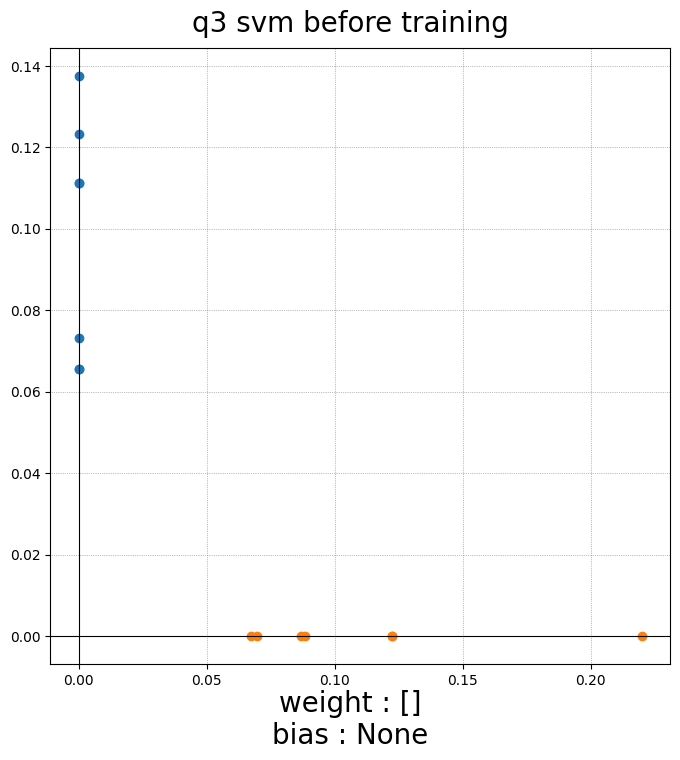

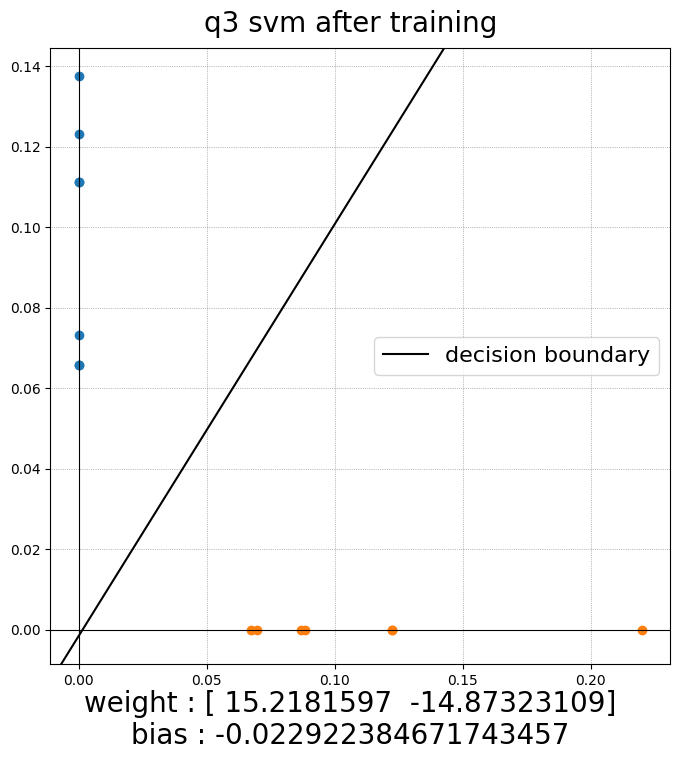

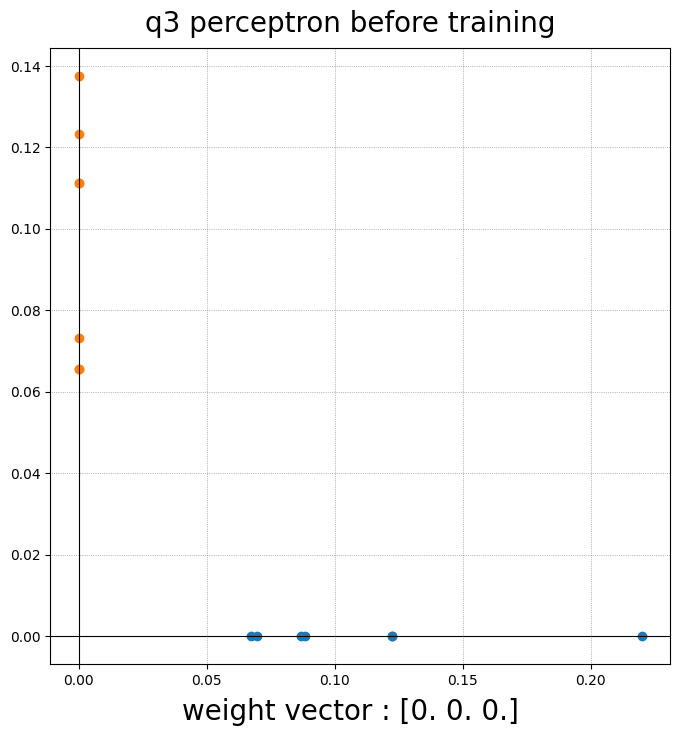

perceptron iteration 1:

gradient of Jp = [-0.77668328  0.68811571  0.        ]
new weight = old weight + learning rate * gradient of Jp
 = [0. 0. 0.] + 0.01 * [-0.77668328  0.68811571  0.        ]
 = [-0.00776683  0.00688116  0.        ]
 = [-0.00776683  0.00688116  0.        ]



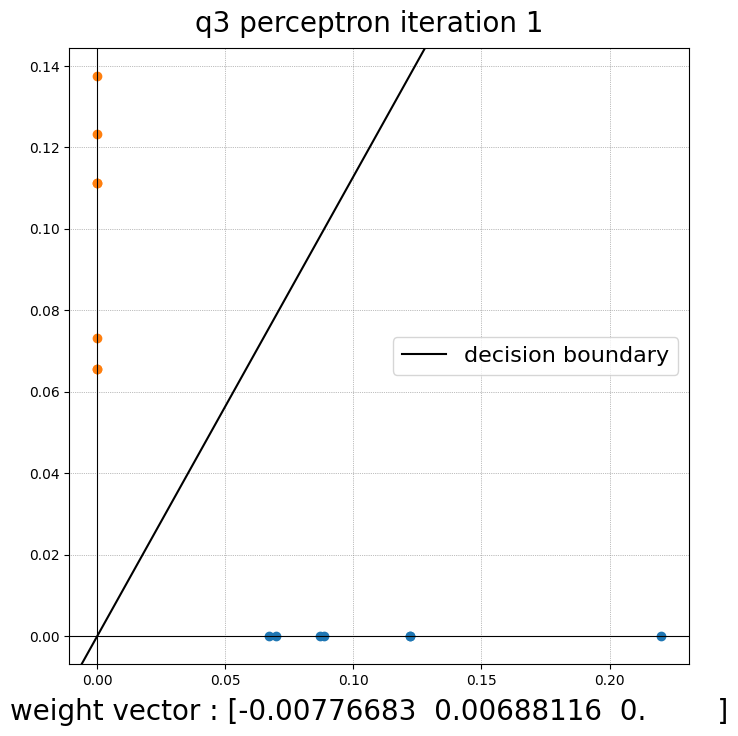

perceptron iteration 2:

gradient of Jp = [0. 0. 0.]
new weight = old weight + learning rate * gradient of Jp
 = [-0.00776683  0.00688116  0.        ] + 0.01 * [0. 0. 0.]
 = [-0.00776683  0.00688116  0.        ]
 = [-0.00776683  0.00688116  0.        ]



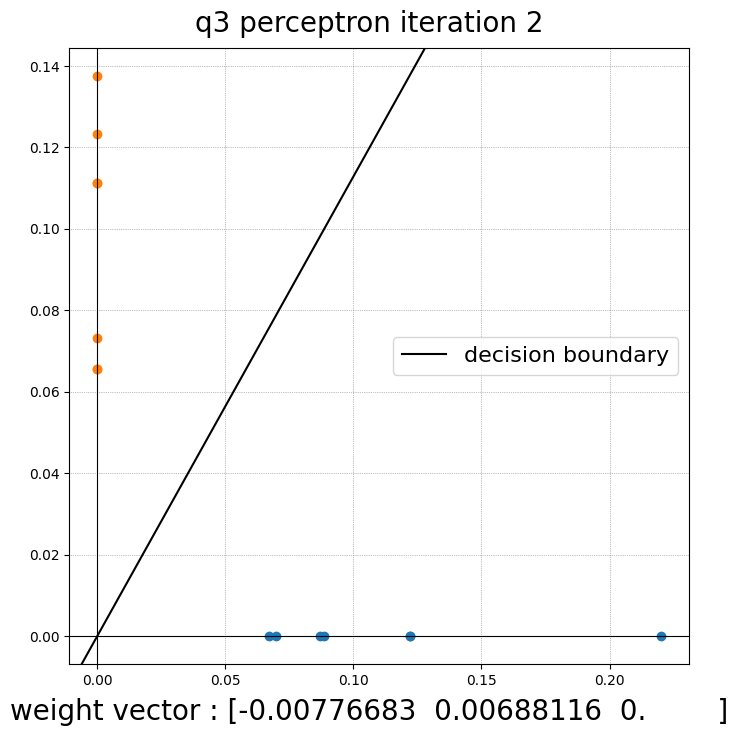

no significant change in weight vector after this iteration. stopping.


In [ ]:
import numpy as np, cv2
# reading images
images=[]
for i in range(1,15):
    images.append(cv2.imread(f'/content/poly/poly{i}.png'))
# choosing features:
def greenish_pixels(image):
  X,Y=image.shape[:2]
  value=0
  for x in range(X):
    for y in range(Y):
       b,g,r=image[x,y]
  # if int(g)>int(b)+int(r):
       if g>b and g>r:
        value +=1
  return value/X/Y

def reddish_pixels(image):
  X,Y=image.shape[:2]
  value=0
  for x in range(X):
    for y in range(Y):
       b,g,r=image[x,y]
  # if int(g)>int(b)+int(r):
       if r>b and r>g:
          value+=1
  return value/X/Y

x1=[]
x2=[]
# extracting features:
for image in images:
  x1.append(greenish_pixels(image))
  x2.append(reddish_pixels(image))
# training
X=np.array(list(zip(x1,x2)))
Y_perc=np.array([1,1,1,1,1,1,1, 0, 0, 0, 0, 0, 0, 0])
Y_svm =np.array([1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1])
svm.demo(X,Y_svm,plot_title="q3")
Perceptron.demo(X,Y_perc,learning_rate=0.01,plot_title="q3")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class multi_class_perceptron:


    def __init__(self,train_data,train_labels):
        self.__train_data=np.append(train_data,np.array([[1]]*len(train_data)),axis=1)
        self.__train_labels=train_labels
        self.__classes=np.unique(self.__train_labels)
        self.__c=len(self.__classes)
        # initialise weight vector, set default learning rate
        self.__weight=np.zeros_like(self.__train_data[0])
        self.__learning_rate=0.01
        self.__split_data_points()
        self.__weight=np.zeros((self.__c,self.__train_data.shape[1]),dtype=float)



    def __split_data_points(self):
        self.__data_points=dict([(c,[[],[]]) for c in self.__classes])
        for i,p in enumerate(self.__train_data):
            self.__data_points[self.__train_labels[i]][0].append(p[0])
            self.__data_points[self.__train_labels[i]][1].append(p[1])
        self.__class_wise_train_data=[]
        for i in range(self.__c):
            self.__class_wise_train_data.append(-self.__train_data.copy())
        for i in range(self.__c):
            for j in range(self.__train_data.shape[0]):
                if self.__train_labels[j]==i:
                   self.__class_wise_train_data[i][j]=-self.__class_wise_train_data[i][j]



    def set_learning_rate(self,learning_rate):
        self.__learning_rate=learning_rate

    

    def train(self):
        for i,train_data in enumerate(self.__class_wise_train_data):
        # print(train_data)
            gradient_of_Jp=np.zeros(self.__train_data[0].shape,dtype=float)
            for y in train_data:
                if not self.__weight[i] @ y > 0:
                   gradient_of_Jp+=y
            self.__weight[i]= self.__weight[i] + self.__learning_rate * gradient_of_Jp
    



    def show_plot(self,title=''):

        plt.figure(figsize=(8,8))
        plt.figtext(0.5, 0.9, title, ha="center", fontsize=20)
        plt.axvline(0,color='black',linewidth=.8)
        plt.axhline(0,color='black',linewidth=.8)
        plt.grid(color='grey', linestyle=':', linewidth=.5)
        # plotting data
        for c in self.__data_points:
              plt.scatter(self.__data_points[c][0],self.__data_points[c][1],label=f'class {c}')

    # plotting decision boundary


        def plot_decision_boundary(weight,label,color):
            if np.any(weight[:-1]):
                a,b,c=weight
                if b==0:
                    plt.axvline(-c/a, c=color, label=label)
                else:
                    y_intercept=-c/b
                    slope=-a/b
                    plt.axline((0,y_intercept), slope=slope, c=color, label=label)
        colors=['b','g','y']
        for i in range(self.__weight.shape[0]):
            plot_decision_boundary(self.__weight[i],f'db b/w "class {i}" and "not class {i}"',colors[i])
        plt.legend(loc='best',fontsize=16)
        plt.figtext(0.35, 0.04, "weight vectors :", ha="center", fontsize=16)
        plt.figtext(0.6, 0.005, str(self.__weight), ha="center", fontsize=14)
        title=title.replace(' ','_')
        plt.show()



    def get_weight(self):
        return self.__weight.copy()



    def demo(data,label,plot_title='',learning_rate=None,weight=None):
      a=multi_class_perceptron(data,label)
      if learning_rate is not None:
           a.set_learning_rate(learning_rate)
      if weight is not None:
           a.set_weight(weight)
      if plot_title!='':
          plot_title=plot_title+' '

      a.show_plot(plot_title+"perceptron before training")
      i=1
      prev_weight=a.get_weight()
      while True:
          a.train()
          if i in [100,500,1000]:
              a.show_plot(plot_title+f"perceptron iteration {i}")
          if i==1000:
              break
          prev_weight=a.get_weight()
          i+=1



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers

class multi_class_svm:


    def __init__(self,train_data,train_labels):
      self.__X=train_data
      self.__train_labels=train_labels
      self.__classes=np.unique(self.__train_labels)
      self.__c=len(self.__classes)
      self.__Y_for_each_class=[]
      for i in range(self.__c):
          self.__Y_for_each_class.append(train_labels.copy())
          for j in range(train_labels.shape[0]):
              self.__Y_for_each_class[i][j] = 1.0 if self.__Y_for_each_class[i][j] == i else -1
      self.__Y_for_each_class=np.array(self.__Y_for_each_class)
      self.__split_for_plotting()
      self.__weight=np.array([])
      self.__bias=np.array([])


    def train(self):
      n=self.__X.shape[0]


      def train_for_one_class(Y):
          H=matrix(np.multiply((Y.T @ Y),(self.__X @ self.__X.T)).astype(float))
          f=matrix(np.array([-1]*n).astype(float),tc='d')
          A=matrix(-np.eye(n).astype(float))
          a=matrix(np.array([0.0]*n).astype(float))
          B=matrix(Y.astype(float),tc='d')
          b=matrix(0.0)
          solvers.options['show_progress'] = False
          solution = solvers.qp(H,f,A,a,B,b)
          alphas = np.array(solution['x'])
          weight=np.zeros_like(self.__X[0],dtype=float)
          for i,alpha in enumerate(alphas):
              weight+=alpha*Y[0][i]*self.__X[i]
          # max_index=np.argmax(alphas)
          # bias = Y[0][max_index] - weight.T @ self.__X[max_index]
          l1=[]
          l2=[]
          for i in range(len(self.__X)):
              if Y[0][i]==1:
                 l1.append(weight.T @ self.__X[i])
              else:
                l2.append(weight.T @ self.__X[i])
          bias=0.5 * (np.min(l1)-np.max(l2))
          return weight,bias



      self.__weight=[]
      self.__bias=[]
      for i in range(self.__c):
            weight,bias=train_for_one_class(self.__Y_for_each_class[i].reshape(1,-1))
            self.__weight.append(weight)
            self.__bias.append(bias)
      self.__weight=np.array(self.__weight)
      self.__bias=np.array(self.__bias)



    def __split_for_plotting(self):
      self.__data_points=dict([(c,[[],[]]) for c in self.__classes])
      for i,p in enumerate(self.__X):
        self.__data_points[self.__train_labels[i]][0].append(p[0])
        self.__data_points[self.__train_labels[i]][1].append(p[1])
    # to plot the data and the decision boundary



    def show_plot(self,title=''):
        # styles
        plt.figure(figsize=(8,8))
        plt.figtext(0.5, 0.9, title, ha="center", fontsize=20)
        plt.axvline(0,color='black',linewidth=.8)
        plt.axhline(0,color='black',linewidth=.8)
        plt.grid(color='grey', linestyle=':', linewidth=.5)
        # plotting data
        for c in self.__data_points:
            plt.scatter(self.__data_points[c][0],self.__data_points[c][1],label=f'class {c}')
        # plotting decision boundary



        def plot_decision_boundary(weight,bias,label,color):
            if np.any(weight[:-1]):
                a,b=weight
                c=bias
                if b==0:
                    plt.axvline(-c/a, c=color, label=label)
                else:
                    y_intercept=-c/b
                    slope=-a/b
                    plt.axline((0,y_intercept), slope=slope, c=color, label=label)
        colors=['b','g','y']
        for i in range(self.__bias.shape[0]):
            plot_decision_boundary(self.__weight[i],self.__bias[i],f'db b/w "class {i}" and "not class {i}"', colors[i])
        title=title.replace(' ','_')
        plt.show()



    def demo(data,label,plot_title=''):
        a=multi_class_svm(data,label)
        if plot_title!='':
            plot_title=plot_title+' '
        a.show_plot(plot_title+"svm before training")
        a.train()
        a.show_plot(plot_title+"svm after training")

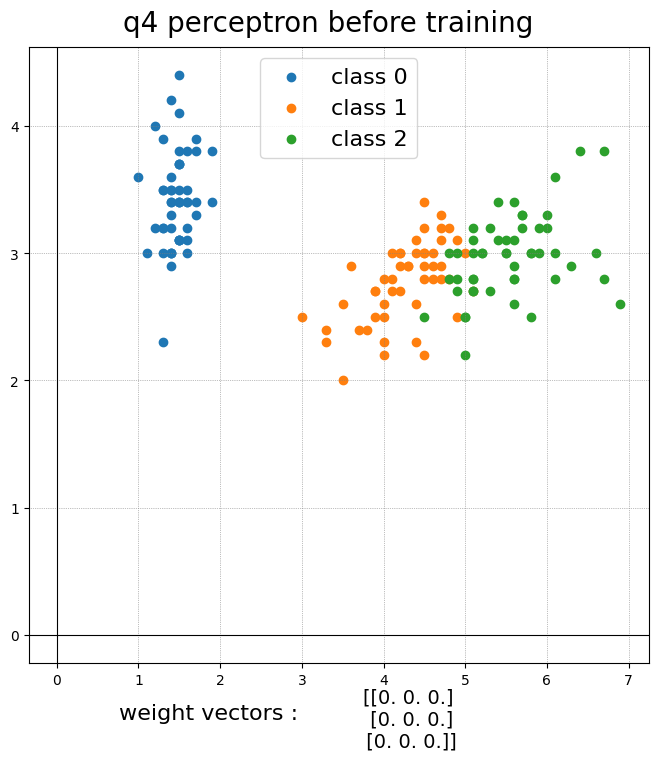

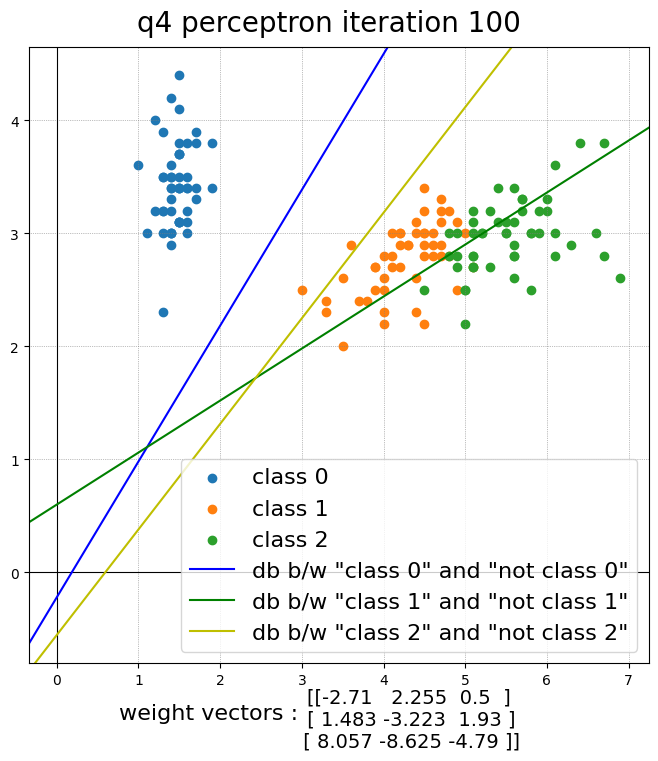

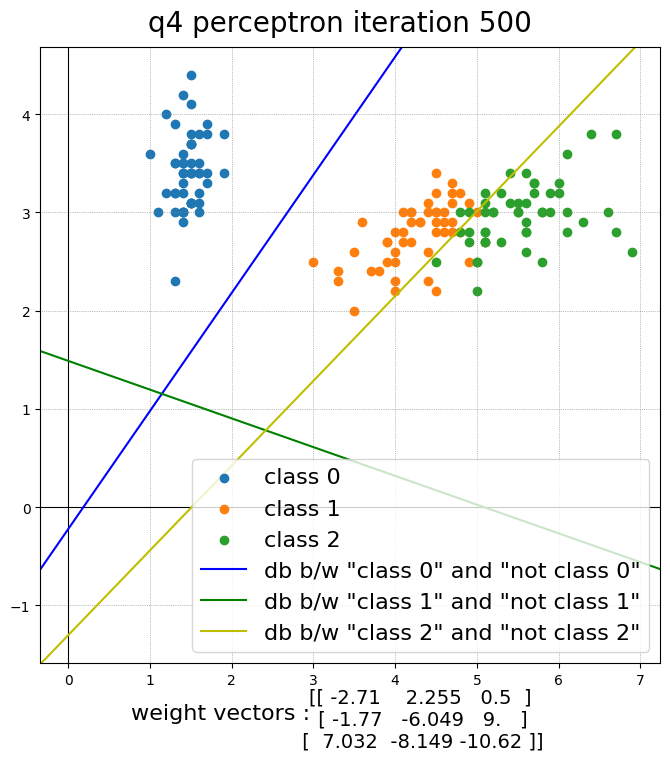

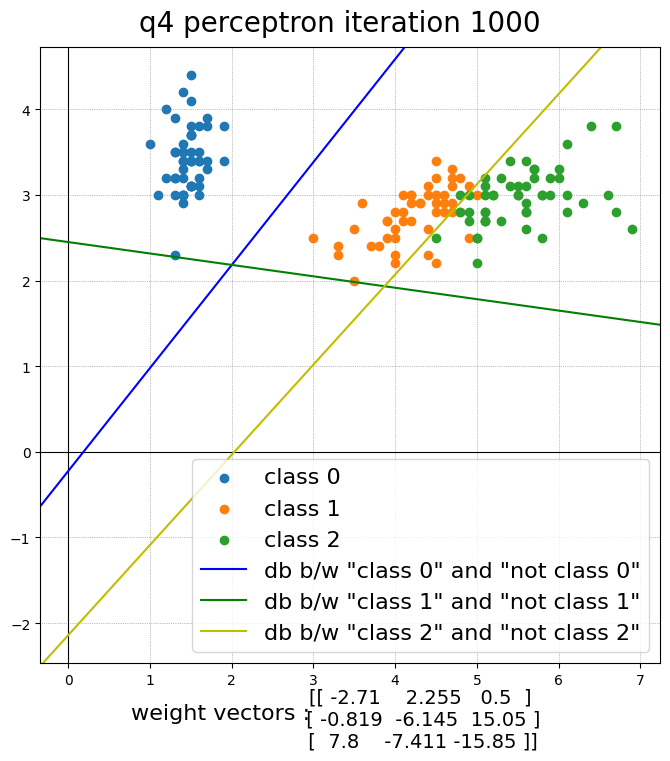

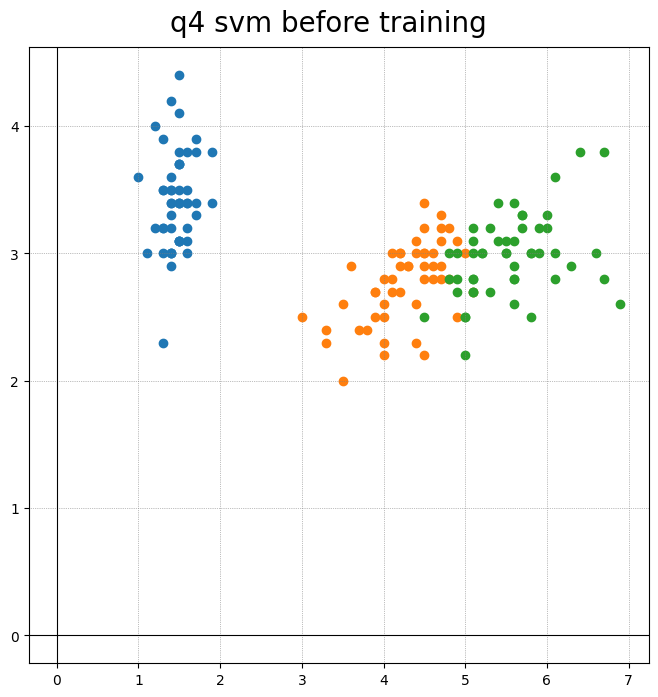

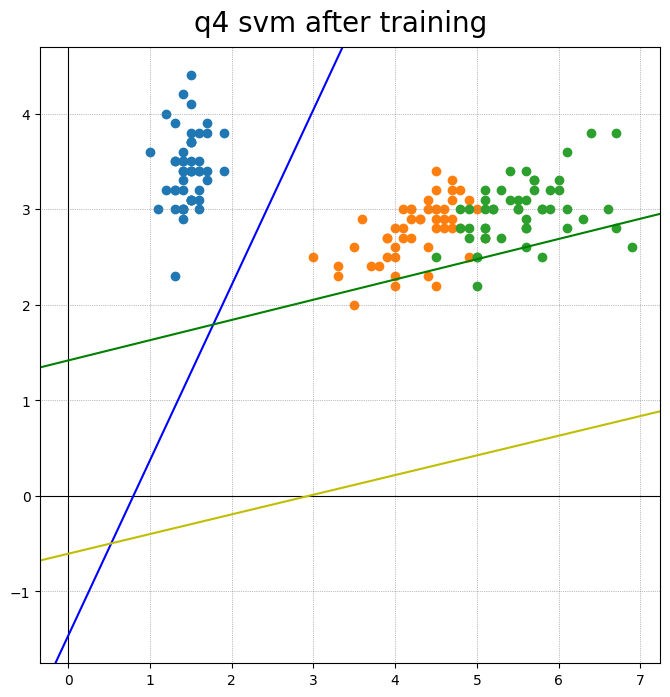

In [ ]:
import numpy as np
# extract required data from file
data = np.genfromtxt('iris.csv', delimiter=',',dtype=str)
pl_index = np.where(data[0] == 'petal_length')[0][0]
sw_index = np.where(data[0] == 'sepal_width')[0][0]
variety_index = np.where(data[0] == 'species')[0][0]
train_data=data[1:,[pl_index,sw_index]].astype(float)
train_label=data[1:,[variety_index]]
unique_labels = np.unique(train_label)
d={}
for i,label in enumerate(unique_labels):
    d[label]=i
train_label_encoded=np.array([d[label[0]] for label in train_label])
multi_class_perceptron.demo(train_data,train_label_encoded,plot_title='q4')
multi_class_svm.demo(train_data,train_label_encoded,plot_title='q4')
